In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## TU257 - Lab 11 - Text Mining - Demo Notebook
##### In this notebook we will look at two examples of using Text Mining
##### The first example looks at example shown in the Notes
##### ---
##### The second example (see below) is a Demo of Text Mining PDF documents
##### See blog post https://oralytics.com/2018/05/21/creating-a-word-cloud-using-python/

In [2]:
#tokenise the data set 
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
#The following line is needed for the first time you use NLTK
# After that, comment the lines out
#nltk.download('punkt')
#nltk.download('stopwords')

text = "My name is John. I live in New York Zip 90210. My dog loves to eat Pizza all Day."

tokens = word_tokenize(text) 

print(tokens)


['My', 'name', 'is', 'John', '.', 'I', 'live', 'in', 'New', 'York', 'Zip', '90210', '.', 'My', 'dog', 'loves', 'to', 'eat', 'Pizza', 'all', 'Day', '.']


In [3]:
#converts to lower case, removes numbers and punctuation
wordsFiltered = [tokens.lower() for tokens in tokens if tokens.isalpha()] 

print(len(wordsFiltered)) 
print(wordsFiltered)


18
['my', 'name', 'is', 'john', 'i', 'live', 'in', 'new', 'york', 'zip', 'my', 'dog', 'loves', 'to', 'eat', 'pizza', 'all', 'day']


In [4]:
#We initialize the stopwords variable which is a list of words like 
#"The", "I", "and", etc. that don't hold much value as keywords 
#download and print the stop words for the English language
from nltk.corpus import stopwords

stop_words = stopwords.words('english') 
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
#Example of adding additional Stop Words.
#Some iteration is needed to add/remove to this list to suit the data set & Domain being examined
#these are added 
extra_stop_words = ['ireland', 'irish','need', 'also', 'set', 'within', 'use', 'order', 'would', 'year'] 
stop_words.extend(extra_stop_words) 
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
#Remove stop words from tokenised data set 
filtered_words = [word for word in wordsFiltered if word not in stop_words] 
print(filtered_words)


['name', 'john', 'live', 'new', 'york', 'zip', 'dog', 'loves', 'eat', 'pizza', 'day']


In [7]:
#Remove punctuation from list.
#This might have already been done as part of previous step 
#  but you need to check to ensure it is done correctly and to suit your problem being investigated

tokenizer = RegexpTokenizer(r'\w+') 
tokenizer.tokenize('Eighty-seven miles to go, yet. Onward!')

#See hypenated word(s)

['Eighty', 'seven', 'miles', 'to', 'go', 'yet', 'Onward']

In [8]:
from nltk.stem import PorterStemmer

porter = PorterStemmer() 

#provide a word to be stemmed 
print("Porter Stemmer") 
print(porter.stem("cats")) 
print(porter.stem("trouble")) 
print(porter.stem("troubling")) 
print(porter.stem("troubled"))


Porter Stemmer
cat
troubl
troubl
troubl


In [9]:
#get the frequency of each word from collections 
from collections import Counter

# count frequencies 
cnt = Counter() 
for word in filtered_words: 
   cnt[word] += 1 

print(cnt)


Counter({'name': 1, 'john': 1, 'live': 1, 'new': 1, 'york': 1, 'zip': 1, 'dog': 1, 'loves': 1, 'eat': 1, 'pizza': 1, 'day': 1})


In [10]:
#--- End of Demo ---
#The final output isn't really meaningful or useful.
#but gives a simple demostration of what happens ina simple way.
#These steps can be applied to a larger data set.
#-------------------


In [11]:
# Exercise - Modify the text used in this demo to something different. Something that's of interest to you.
# Examine what happens at each step
# Change the text and rerun to examine what happens.
# Change the stopwords list and rerun

### Second Demostration - Text Mining PDF Document & Creating WordCloud

##### The second example (see below) is a Demo of Text Mining PDF documents
##### See blog post https://oralytics.com/2018/05/21/creating-a-word-cloud-using-python/

In [12]:
# New libraries - urllib -- come pre-installed in Anaconda
#                 bs4  -- come pre-installed in Anaconda

import nltk
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://www.oralytics.com/"
html = urlopen(url).read()
print(html)


b'<!DOCTYPE html>\n<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->\n<!--[if IE 7]> <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->\n<!--[if IE 8]> <html class="no-js lt-ie9" lang="en"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js" lang="en"> <!--<![endif]-->\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Ora-lytics</title>\n<link rel="profile" href="http://gmpg.org/xfn/11">\n<link rel="pingback" href="https://oralytics.com/xmlrpc.php">\n\n<meta name=\'robots\' content=\'max-image-preview:large\' />\n<meta name="google-site-verification" content="5_gehZ06ILCmVK6_yUuquF6FvfE2_DWklNxXChPDtmA" />\n<meta name="msvalidate.01" content="0BD71865719D64AC53DCB30DFD743DCA" />\n\n<!-- Async WordPress.com Remote Login -->\n<script id="wpcom_remote_login_js">\nvar wpcom_remote_login_extra_auth = \'\';\nfunction wpcom_remote_login_remove_dom_node_id( element_id ) {\n\tvar dom_node = 

In [13]:
#Extract just the Text from the webpage
soup = BeautifulSoup(html)
print(soup)


<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]--><!--[if IE 7]> <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]--><!--[if IE 8]> <html class="no-js lt-ie9" lang="en"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Ora-lytics</title>
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<link href="https://oralytics.com/xmlrpc.php" rel="pingback"/>
<meta content="max-image-preview:large" name="robots"/>
<meta content="5_gehZ06ILCmVK6_yUuquF6FvfE2_DWklNxXChPDtmA" name="google-site-verification"/>
<meta content="0BD71865719D64AC53DCB30DFD743DCA" name="msvalidate.01"/>
<!-- Async WordPress.com Remote Login -->
<script id="wpcom_remote_login_js">
var wpcom_remote_login_extra_auth = '';
function wpcom_remote_login_remove_dom_node_id( element_id ) {
	var dom_node = document.getElementById( element_i

In [14]:
# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out
    
print(soup)

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]--><!--[if IE 7]> <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]--><!--[if IE 8]> <html class="no-js lt-ie9" lang="en"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Ora-lytics</title>
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<link href="https://oralytics.com/xmlrpc.php" rel="pingback"/>
<meta content="max-image-preview:large" name="robots"/>
<meta content="5_gehZ06ILCmVK6_yUuquF6FvfE2_DWklNxXChPDtmA" name="google-site-verification"/>
<meta content="0BD71865719D64AC53DCB30DFD743DCA" name="msvalidate.01"/>
<!-- Async WordPress.com Remote Login -->

<link href="//ced.sascdn.com" rel="dns-prefetch"/>
<link href="//s1.wp.com" rel="dns-prefetch"/>
<link href="//s2.wp.com" rel="dns-prefetch"/>
<link href="//s0.wp.com" rel="dns-prefetch"/>

In [15]:
#Extract plain text and remove whitespacing

#The first line in the following extracts just the plain text and the remaining lines removes leading and trailing spaces, 
#compacts multi-headlines and drops blank lines.
text = soup.get_text()
print(text)

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)

print(text)

 



Ora-lytics

























































































 


















Ora-lytics
By Brendan Tierney


-




Blog
My Books
Consulting Services
Data Sets

Scottish Whisky – Updated
Irish Whiskey Distilleries
CAO Points & Profiling since 2015
Leaving Certificate grade per Subject since 2015
Data Sets for Data Analytics/Science


Contact Me
 




SelectAI – Can metadata help 

Posted on April 5, 2024 Updated on April 2, 2024 

Continuing with the exploration of Select AI, in this post I’ll look at how metadata can help. In my previous posts on Select AI, I’ve walked through examples of exploring the data in the SH schema and how you can use some of the conversational features. These really give a lot of potential for developing some useful features in your apps. 
Many of you might have encountered schemas here either the table names and/or column names didn’t make sense. Maybe their names looked like some weird code or something, and y

In [16]:
#Remove stop words, tokenise and convert to lower case
#download and print the stop words for the English language
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

{'the', 'aren', 'shan', 'your', 'it', 'above', 'hasn', 'have', 'am', 'until', 'mustn', 'that', 'o', 'has', 'we', 'through', 'shouldn', 'weren', 'our', 'between', 'them', 'him', 'below', 'doing', 'll', 'these', 'while', 'this', 'not', 'on', 'when', "needn't", 'won', 're', 'in', 'those', 'other', "she's", "should've", 'but', 'an', 'himself', "you'd", 'can', 'hers', "isn't", 'then', 'she', 'if', 'each', 'me', 'had', "wasn't", 'their', 'they', 'herself', 'wasn', "weren't", 'her', "hasn't", 'further', 'being', 'is', "didn't", 'hadn', 'myself', "mightn't", 'haven', 'by', 'all', 'again', "mustn't", 'with', 'doesn', 'here', 'now', "couldn't", 'been', 'couldn', 'yourself', 'during', 'you', "doesn't", "shouldn't", 'no', "shan't", "it's", 'out', 'itself', 'having', 'some', 'who', 'against', 'i', 'm', 'few', 'will', "you're", 'to', 'whom', 'mightn', 'there', 'd', 'ain', 'any', 'his', 'do', 'of', 'off', 'wouldn', 'over', 'yourselves', 'what', 'most', 'such', 'how', 'was', 'so', 'nor', 'both', 'ours

In [17]:
#tokenise the data set
from nltk.tokenize import sent_tokenize, word_tokenize
words = word_tokenize(text)
print(words)

['Ora-lytics', 'Ora-lytics', 'By', 'Brendan', 'Tierney', '-', 'Blog', 'My', 'Books', 'Consulting', 'Services', 'Data', 'Sets', 'Scottish', 'Whisky', '–', 'Updated', 'Irish', 'Whiskey', 'Distilleries', 'CAO', 'Points', '&', 'Profiling', 'since', '2015', 'Leaving', 'Certificate', 'grade', 'per', 'Subject', 'since', '2015', 'Data', 'Sets', 'for', 'Data', 'Analytics/Science', 'Contact', 'Me', 'SelectAI', '–', 'Can', 'metadata', 'help', 'Posted', 'on', 'April', '5', ',', '2024', 'Updated', 'on', 'April', '2', ',', '2024', 'Continuing', 'with', 'the', 'exploration', 'of', 'Select', 'AI', ',', 'in', 'this', 'post', 'I', '’', 'll', 'look', 'at', 'how', 'metadata', 'can', 'help', '.', 'In', 'my', 'previous', 'posts', 'on', 'Select', 'AI', ',', 'I', '’', 've', 'walked', 'through', 'examples', 'of', 'exploring', 'the', 'data', 'in', 'the', 'SH', 'schema', 'and', 'how', 'you', 'can', 'use', 'some', 'of', 'the', 'conversational', 'features', '.', 'These', 'really', 'give', 'a', 'lot', 'of', 'potent

In [18]:
# removes punctuation and numbers
wordsFiltered = [word.lower() for word in words if word.isalpha()]
print(wordsFiltered)

['by', 'brendan', 'tierney', 'blog', 'my', 'books', 'consulting', 'services', 'data', 'sets', 'scottish', 'whisky', 'updated', 'irish', 'whiskey', 'distilleries', 'cao', 'points', 'profiling', 'since', 'leaving', 'certificate', 'grade', 'per', 'subject', 'since', 'data', 'sets', 'for', 'data', 'contact', 'me', 'selectai', 'can', 'metadata', 'help', 'posted', 'on', 'april', 'updated', 'on', 'april', 'continuing', 'with', 'the', 'exploration', 'of', 'select', 'ai', 'in', 'this', 'post', 'i', 'll', 'look', 'at', 'how', 'metadata', 'can', 'help', 'in', 'my', 'previous', 'posts', 'on', 'select', 'ai', 'i', 've', 'walked', 'through', 'examples', 'of', 'exploring', 'the', 'data', 'in', 'the', 'sh', 'schema', 'and', 'how', 'you', 'can', 'use', 'some', 'of', 'the', 'conversational', 'features', 'these', 'really', 'give', 'a', 'lot', 'of', 'potential', 'for', 'developing', 'some', 'useful', 'features', 'in', 'your', 'apps', 'many', 'of', 'you', 'might', 'have', 'encountered', 'schemas', 'here', 

In [19]:
# remove stop words from tokenised data set
filtered_words = [word for word in wordsFiltered if word not in stopwords.words('english')]
print(filtered_words)

['brendan', 'tierney', 'blog', 'books', 'consulting', 'services', 'data', 'sets', 'scottish', 'whisky', 'updated', 'irish', 'whiskey', 'distilleries', 'cao', 'points', 'profiling', 'since', 'leaving', 'certificate', 'grade', 'per', 'subject', 'since', 'data', 'sets', 'data', 'contact', 'selectai', 'metadata', 'help', 'posted', 'april', 'updated', 'april', 'continuing', 'exploration', 'select', 'ai', 'post', 'look', 'metadata', 'help', 'previous', 'posts', 'select', 'ai', 'walked', 'examples', 'exploring', 'data', 'sh', 'schema', 'use', 'conversational', 'features', 'really', 'give', 'lot', 'potential', 'developing', 'useful', 'features', 'apps', 'many', 'might', 'encountered', 'schemas', 'either', 'table', 'names', 'column', 'names', 'make', 'sense', 'maybe', 'names', 'looked', 'like', 'weird', 'code', 'something', 'look', 'document', 'often', 'referred', 'data', 'dictionary', 'decode', 'actual', 'meaning', 'instances', 'schemas', 'touched', 'others', 'minor', 'changes', 'allowed', 'la

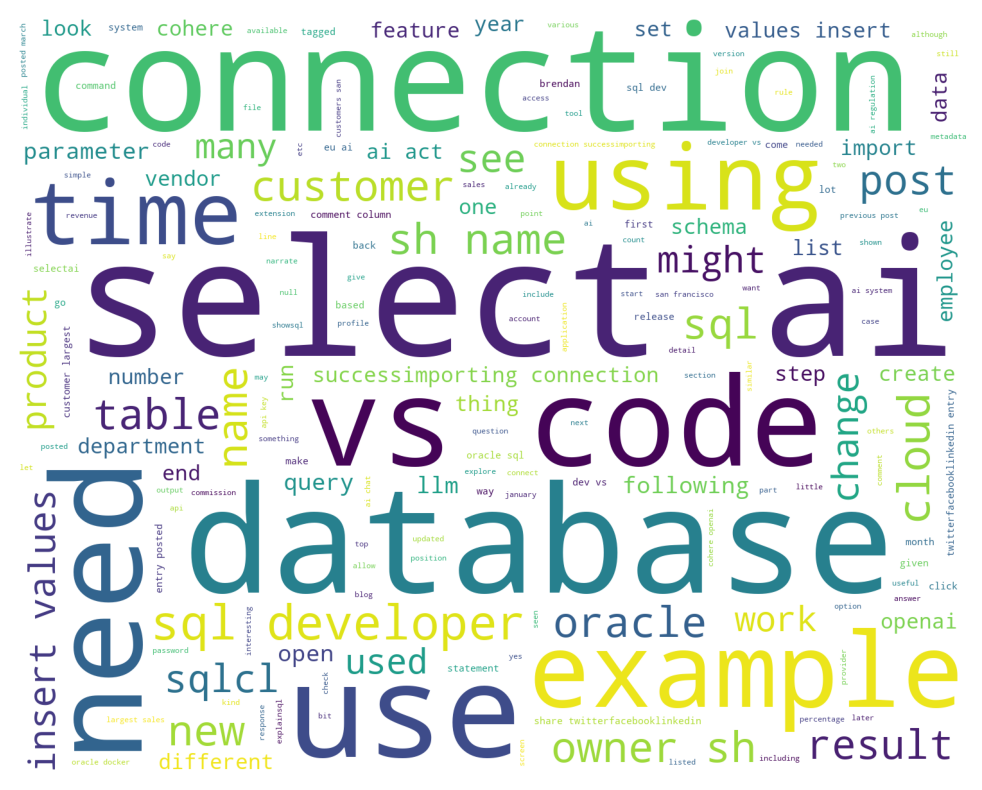

In [20]:
# conda install -c conda-forge wordcloud

#Create the Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(filtered_words))

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()
#wc.to_file("/wordcloud.png")

#If image does not display, just rerun the cell

In [24]:
#Create Word Cloud based on Frequency Counts
from collections import Counter

# count frequencies
cnt = Counter()
for word in filtered_words:
    cnt[word] += 1

print(cnt)


Counter({'ai': 113, 'sql': 71, 'select': 64, 'connections': 41, 'oracle': 39, 'use': 38, 'connection': 38, 'code': 37, 'name': 37, 'database': 35, 'vs': 34, 'need': 33, 'using': 31, 'developer': 31, 'time': 27, 'cloud': 26, 'sh': 25, 'posted': 24, 'owner': 23, 'post': 22, 'customers': 22, 'new': 21, 'cohere': 20, 'see': 19, 'eu': 19, 'sqlcl': 19, 'might': 18, 'insert': 18, 'values': 18, 'openai': 18, 'first': 18, 'sales': 18, 'act': 18, 'many': 17, 'example': 17, 'used': 17, 'results': 17, 'api': 17, 'following': 16, 'query': 16, 'get': 16, 'customer': 16, 'open': 16, 'systems': 16, 'successimporting': 16, 'look': 15, 'table': 15, 'like': 15, 'comment': 15, 'share': 15, 'one': 15, 'databases': 15, 'data': 14, 'examples': 14, 'column': 14, 'key': 13, 'work': 13, 'entry': 13, 'different': 13, 'parameter': 13, 'run': 13, 'import': 13, 'previous': 12, 'changes': 12, 'create': 12, 'number': 12, 'end': 12, 'list': 12, 'twitterfacebooklinkedin': 12, 'llm': 12, 'things': 12, 'years': 12, 'vend

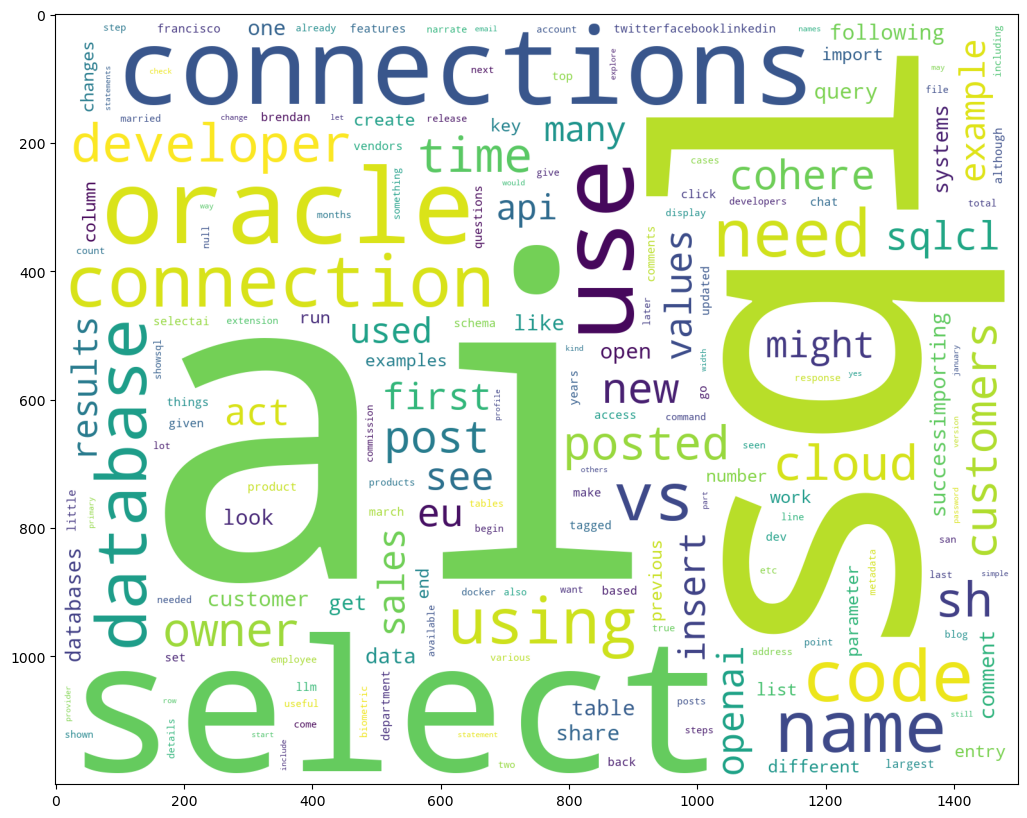

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate_from_frequencies(cnt)

plt.figure(figsize=(20,10))
plt.imshow(wc)
#plt.axis("off")
plt.show()


In [22]:
# Comment: When you look at this Word Cloud you can see some everyday word which have little meaning
# For example you might observer 'see', 'new', 'also', 'love', 'let', 'blog', 'one', 'little', etc

# Exercise: Add these words to the StopWords list, and add anyothers you thinks should be added
#           Rerun the code and see how the Word Cloud changes.

# This approach can give you some useful insights into documents, or different versions of the same document.
# For example, check out the blog posts on the Ireland General Election Party Manifestos for the past elections.

#   https://oralytics.com/2020/01/21/ge2020-analysing-party-manifestos-using-python/
# and  https://oralytics.com/2020/01/24/ge2020-comparing-party-manifestos-to-2016/